In [78]:
import os

import matplotlib.pyplot as plt
import numpy as np

In [114]:
RNG_SEED = 42

plt.style.use('seaborn')
plt.rcParams.update({'font.size': 22})
np.random.seed(seed=RNG_SEED)


def set_size(width_pt, fraction=1, subplots=(1, 1)):
    """Source: https://jwalton.info/Matplotlib-latex-PGF/"""
    fig_width_pt = width_pt * fraction
    inches_per_pt = 1 / 72.27
    golden_ratio = (5**.5 - 1) / 2
    fig_width_in = fig_width_pt * inches_per_pt
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])
    return (fig_width_in, fig_height_in)

In [115]:
class ToyDataset:
    def __init__(self, size):
        self.size = size
        mask = np.random.binomial(1, 0.8, size=(size // 2,))[:, None]
        g1 = np.random.randn(size // 2, 2) + 5
        g2 = np.random.randn(size // 2, 2) - 5
        self.ds = np.float32(g1 * mask + g2 * (1 - mask))
        self.ds_y = mask
        
        self.ds_min = self.ds.min()
        self.ds_max = self.ds.max()
        

    def __len__(self):
        return self.size

    def __getitem__(self, idx):
        return self.ds[idx], self.ds_y[idx]

In [116]:
ds = ToyDataset(5000)

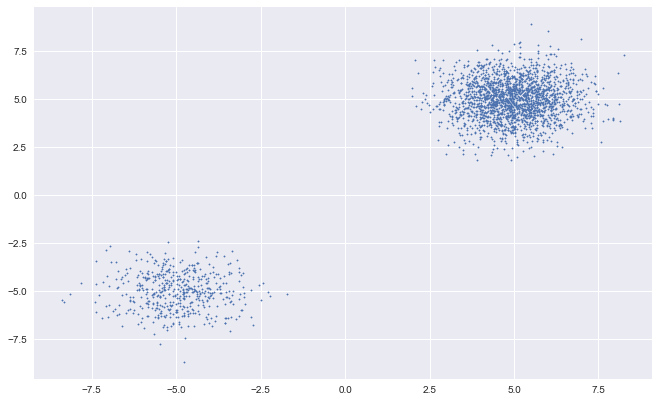

In [117]:
width, height = set_size(800)
fig, ax = plt.subplots(1, 1, figsize=(width, height))
ax.scatter(ds.ds[:, 0], ds.ds[:, 1], s=2)

In [ ]:
ds.